In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
# Import the API key.
from config import weather_api_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=13494875837ab1f9001846ae1f477066


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | hihifo
City not found. Skipping...
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 7 of Set 1 | talnakh
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | chokurdakh
Processing Record 11 of Set 1 | sawakin
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | auka
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | belmonte
Processing Record 18 of Set 1 | pizhma
Processing Record 19 of Set 1 | faanui
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | santiago
Processing Recor

Processing Record 37 of Set 4 | jalu
Processing Record 38 of Set 4 | port-gentil
Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | los llanos de aridane
Processing Record 42 of Set 4 | geraldton
Processing Record 43 of Set 4 | andros town
Processing Record 44 of Set 4 | salinopolis
Processing Record 45 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 46 of Set 4 | douglas
Processing Record 47 of Set 4 | bethel
Processing Record 48 of Set 4 | maragogi
Processing Record 49 of Set 4 | nancha
Processing Record 50 of Set 4 | erenhot
Processing Record 1 of Set 5 | kilmez
City not found. Skipping...
Processing Record 2 of Set 5 | ilulissat
Processing Record 3 of Set 5 | wewak
Processing Record 4 of Set 5 | guaratinga
Processing Record 5 of Set 5 | mitsamiouli
Processing Record 6 of Set 5 | leningradskiy
Processing Record 7 of Set 5 | gornopravdinsk
Processing Record 8 of Set 5 | kothi
Processing Record 9 of Set 

Processing Record 25 of Set 8 | paamiut
Processing Record 26 of Set 8 | bud
Processing Record 27 of Set 8 | saquarema
Processing Record 28 of Set 8 | gimli
Processing Record 29 of Set 8 | ayia galini
Processing Record 30 of Set 8 | slupsk
Processing Record 31 of Set 8 | saint-malo
Processing Record 32 of Set 8 | isla mujeres
Processing Record 33 of Set 8 | porto nacional
Processing Record 34 of Set 8 | natchitoches
Processing Record 35 of Set 8 | broken hill
Processing Record 36 of Set 8 | dikson
Processing Record 37 of Set 8 | port blair
Processing Record 38 of Set 8 | muroto
Processing Record 39 of Set 8 | druzhba
Processing Record 40 of Set 8 | acari
Processing Record 41 of Set 8 | samusu
City not found. Skipping...
Processing Record 42 of Set 8 | yantal
Processing Record 43 of Set 8 | axim
Processing Record 44 of Set 8 | babanusah
City not found. Skipping...
Processing Record 45 of Set 8 | gamba
Processing Record 46 of Set 8 | hami
Processing Record 47 of Set 8 | whitewater
Process

Processing Record 13 of Set 12 | pinheiro machado
Processing Record 14 of Set 12 | yeppoon
Processing Record 15 of Set 12 | safwah
City not found. Skipping...
Processing Record 16 of Set 12 | namatanai
Processing Record 17 of Set 12 | ocean city
Processing Record 18 of Set 12 | tongren
Processing Record 19 of Set 12 | coahuayana
Processing Record 20 of Set 12 | kuryk
Processing Record 21 of Set 12 | takoradi
Processing Record 22 of Set 12 | pangody
Processing Record 23 of Set 12 | fernandez
Processing Record 24 of Set 12 | san
Processing Record 25 of Set 12 | puerto montt
Processing Record 26 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 27 of Set 12 | guaruja
Processing Record 28 of Set 12 | tiznit
Processing Record 29 of Set 12 | luanda
Processing Record 30 of Set 12 | tabialan
City not found. Skipping...
Processing Record 31 of Set 12 | ormara
Processing Record 32 of Set 12 | grand-santi
Processing Record 33 of Set 12 | bhadravati
Processing Record 34 of Set 12 

In [7]:
len(city_data)

553

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,59.94,75,100,17.47,CL,2021-04-05 22:23:23
1,Saskylakh,71.9167,114.0833,-13.14,95,75,8.84,RU,2021-04-05 22:23:23
2,Albany,42.6001,-73.9662,59.00,20,20,20.71,US,2021-04-05 22:21:10
3,Pevek,69.7008,170.3133,-13.23,99,100,5.17,RU,2021-04-05 22:23:24
4,Talnakh,69.4865,88.3972,23.50,96,100,8.68,RU,2021-04-05 22:23:24
5,Rikitea,-23.1203,-134.9692,78.30,67,33,12.84,PF,2021-04-05 22:23:24
6,Barrow,71.2906,-156.7887,-0.40,65,75,12.66,US,2021-04-05 22:23:24
7,Chokurdakh,70.6333,147.9167,-24.95,98,73,0.69,RU,2021-04-05 22:23:25
8,Sawakin,19.1059,37.3321,75.00,73,1,5.75,SD,2021-04-05 22:23:25
9,Thompson,55.7435,-97.8558,35.60,93,90,13.80,CA,2021-04-05 22:23:25


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2021-04-05 22:23:23,-37.6167,-73.6500,59.94,75,100,17.47
1,Saskylakh,RU,2021-04-05 22:23:23,71.9167,114.0833,-13.14,95,75,8.84
2,Albany,US,2021-04-05 22:21:10,42.6001,-73.9662,59.00,20,20,20.71
3,Pevek,RU,2021-04-05 22:23:24,69.7008,170.3133,-13.23,99,100,5.17
4,Talnakh,RU,2021-04-05 22:23:24,69.4865,88.3972,23.50,96,100,8.68
5,Rikitea,PF,2021-04-05 22:23:24,-23.1203,-134.9692,78.30,67,33,12.84
6,Barrow,US,2021-04-05 22:23:24,71.2906,-156.7887,-0.40,65,75,12.66
7,Chokurdakh,RU,2021-04-05 22:23:25,70.6333,147.9167,-24.95,98,73,0.69
8,Sawakin,SD,2021-04-05 22:23:25,19.1059,37.3321,75.00,73,1,5.75
9,Thompson,CA,2021-04-05 22:23:25,55.7435,-97.8558,35.60,93,90,13.80


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

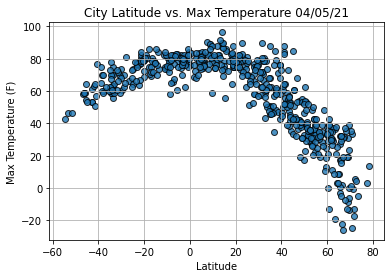

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

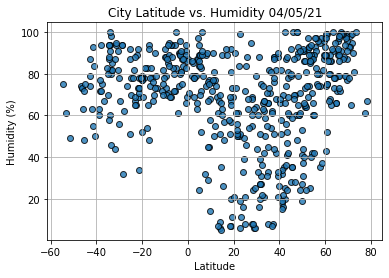

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

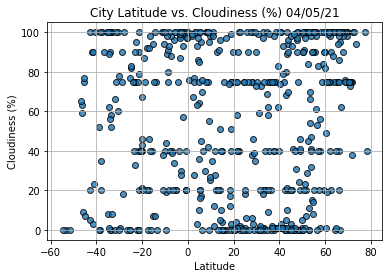

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

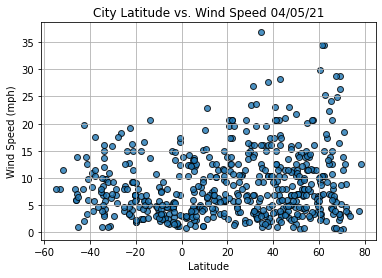

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

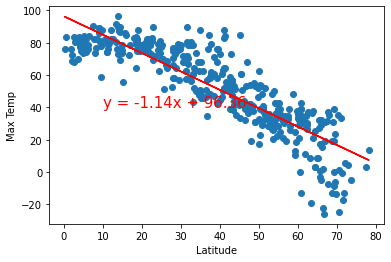

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))

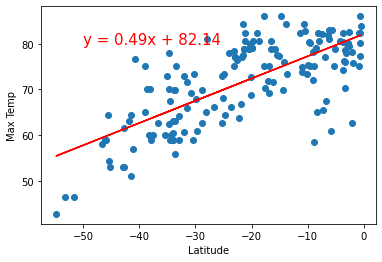

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,80))

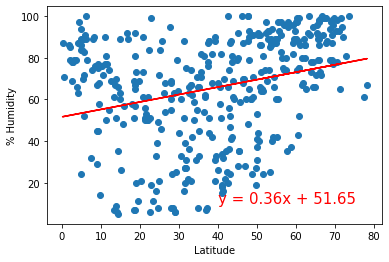

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \ for % Humidity', '% Humidity',(40,10))

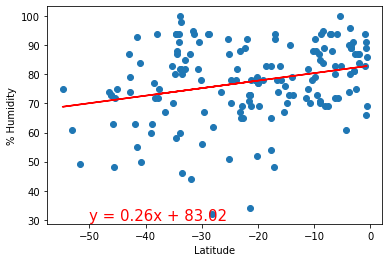

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \ for % Humidity', '% Humidity',(-50,30))

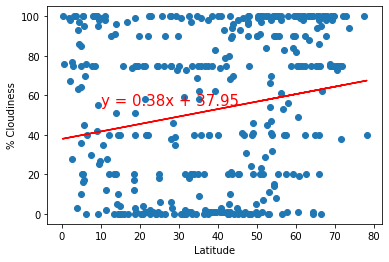

In [27]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

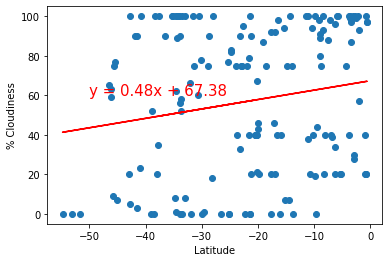

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

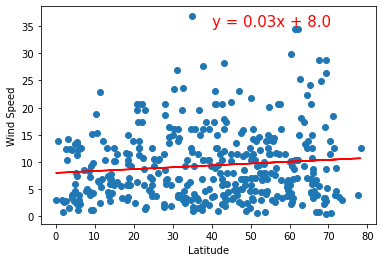

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

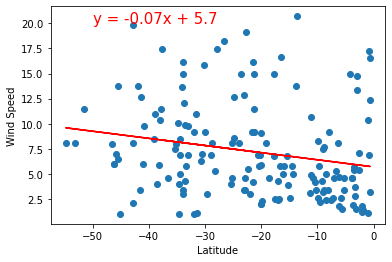

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,20))